In [1]:
import cv2
import os
from matplotlib import pyplot as plt
from deepface import DeepFace
from tqdm import tqdm
from glob import iglob
import json
import pandas as pd

In [2]:
def get_results(model, images):
    size = len(images)
    output = []
    for i in tqdm(range(size), desc=f"Processing with {model}"):
        for s in range(i, size):
            try:
                img1_path = images[i]
                img2_path = images[s]
                result = DeepFace.verify(img1_path=img1_path,
                                         img2_path=img2_path,
                                         model_name=model)
                result["file_name_1"] = img1_path
                result["file_name_2"] = img2_path
                output.append(result)
            except Exception as err:
                print(f"Error occurred on i={i}, s={s}. Error message: {err}")
    return output

In [3]:
def save_results_as_json(file_name, result_json):
    with open(file_name, 'w') as see:
        see.write(json.dumps(result_json, default=str))

In [18]:
# Replace with your file path
input_video = "margo.webm"

# Open the video file
video_capture = cv2.VideoCapture(input_video)

# Get the frame rate and frame count
fps = video_capture.get(cv2.CAP_PROP_FPS)
frame_count = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))



In [19]:
fps

30.0

In [20]:
frame_count

499

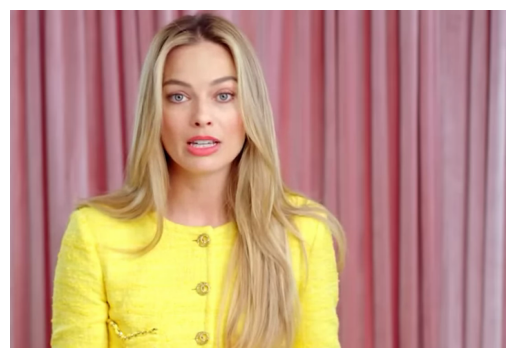

In [24]:
frame_number = 60

# Set the video capture to the desired frame number
video_capture.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

# Read the frame at the specified frame number
ret, frame = video_capture.read()

# Convert the frame from BGR to RGB (OpenCV reads images in BGR format)
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Display the frame using matplotlib
plt.imshow(frame_rgb)
plt.axis('off')  # Turn off axis labels
plt.show()

# With audio

In [2]:
from moviepy.editor import VideoFileClip

# Replace with your file paths
input_video = "Emma Watson introduces The World’s Largest Lesson 2016 n.2.mp4"
output_video = "trimmed_video.mp4"

# Specify the desired start and end times (in seconds)
start_time = 5
end_time = 18

# Load the video clip
video_clip = VideoFileClip(input_video)

# Trim the video clip
trimmed_clip = video_clip.subclip(start_time, end_time)

# Save the trimmed video with the audio
trimmed_clip.write_videofile(output_video, codec="libx264", audio_codec="aac")

# Close the video clip
video_clip.close()


Moviepy - Building video trimmed_video.mp4.
MoviePy - Writing audio in trimmed_videoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video trimmed_video.mp4



Moviepy - Done !
Moviepy - video ready trimmed_video.mp4


# Analyzing trimed video

In [ ]:
# 1. Take the first 2 frames and use them as input for ArcFace model
# 2. Prepare a list of frames to process
# 3. Process list of frames through ArcFace model (tip: use existing code from a previous lesson)

In [29]:
video_capture = cv2.VideoCapture("margo.webm")

In [30]:
frames_number = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
for number in range(1, frames_number + 1):
    ret, frame1 = video_capture.read()
    try:
        cv2.imwrite(f"frame{number}.png", frame1)
    except Exception as er:
        print(f"{number} :: {er}")

494 :: OpenCV(4.8.1) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp:787: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

495 :: OpenCV(4.8.1) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp:787: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

496 :: OpenCV(4.8.1) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp:787: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

497 :: OpenCV(4.8.1) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp:787: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

498 :: OpenCV(4.8.1) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp:787: error: (-215:Assertion failed) !_img.empty(

In [27]:
frames_number

499

In [31]:
file_names = []
for number in range(1, frames_number + 1):
    file_name = f"frame{number}.png"
    file_names.append(file_name)

In [121]:
file_names = file_names[:493]

In [39]:
results_arcface = get_results('ArcFace', file_names)
save_results_as_json('orginal_margo_arcface_file.json', results_arcface)
results_facenet = get_results('Facenet', file_names)
save_results_as_json('orginal_margo_facenet_file.json', results_facenet)

Processing with Facenet: 100%|██████████████| 493/493 [6:49:57<00:00, 49.89s/it]


In [117]:
def create_frames(file_name, folder_path):
    os.makedirs(folder_path, exist_ok=True)

    video_capture = cv2.VideoCapture(file_name)
    frames_number = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
    file_names = []
    
    for number in range(1, frames_number + 1):
        ret, frame = video_capture.read()
        try:
            file_name = f"{folder_path}/frame_{number:04d}.png"  # Using format to ensure 4-digit numbering
            cv2.imwrite(file_name, frame)
            file_names.append(file_name)
        except Exception as er:
            print(f"{number} :: {er}")
    
    return file_names

In [119]:
file_names = create_frames("fake_margo.mp4", "frames/fake/margo")

In [8]:
fake_results_arcface = get_results('ArcFace', file_names)
save_results_as_json('fake_margo_arcface_file.json', fake_results_arcface)
fake_results_facenet = get_results('Facenet', file_names)
save_results_as_json('fake_margo_facenet_file.json', fake_results_facenet)

Processing with Facenet: 100%|███████████████████████████████████████████████████████████████████████████████████| 499/499 [7:10:20<00:00, 51.74s/it]


In [4]:
fake_results_arcface_df = pd.read_json('fake_margo_arcface_file.json')
fake_results_facenet_df = pd.read_json('fake_margo_facenet_file.json')

In [5]:
# fake_df = pd.DataFrame(fake_results_arcface + fake_results_facenet)
fake_df = pd.concat([fake_results_arcface_df, fake_results_facenet_df])

In [6]:
fake_df

,verified,distance,threshold,model,detector_backend,similarity_metric,facial_areas,time,file_name_1,file_name_2
0,True,4.440892e-16,0.68,ArcFace,opencv,cosine,"{'img1': {'x': 152, 'y': 67, 'w': 262, 'h': 26...",1.45,fake_frame1.png,fake_frame1.png
1,True,1.804013e-02,0.68,ArcFace,opencv,cosine,"{'img1': {'x': 152, 'y': 67, 'w': 262, 'h': 26...",0.19,fake_frame1.png,fake_frame2.png
2,False,9.590513e-01,0.68,ArcFace,opencv,cosine,"{'img1': {'x': 152, 'y': 67, 'w': 262, 'h': 26...",0.20,fake_frame1.png,fake_frame3.png
3,True,1.924714e-02,0.68,ArcFace,opencv,cosine,"{'img1': {'x': 152, 'y': 67, 'w': 262, 'h': 26...",0.20,fake_frame1.png,fake_frame4.png
4,True,3.694371e-02,0.68,ArcFace,opencv,cosine,"{'img1': {'x': 152, 'y': 67, 'w': 262, 'h': 26...",0.20,fake_frame1.png,fake_frame5.png
...,...,...,...,...,...,...,...,...,...,...
124745,True,3.434557e-03,0.40,Facenet,opencv,cosine,"{'img1': {'x': 149, 'y': 75, 'w': 243, 'h': 24...",0.21,fake_frame497.png,fake_frame498.png
124746,True,1.046376e-02,0.40,Facenet,opencv,cosine,"{'img1': {'x': 149, 'y': 75, 'w': 243, 'h': 24...",0.20,fake_frame497.png,fake_frame499.png
124747,True,3.330669e-16,0.40,Facenet,opencv,cosine,"{'img1': {'x': 150, 'y': 76, 'w': 241, 'h': 24...",0.20,fake_frame498.png,fake_frame498.png
124748,True,3.359018e-03,0.40,Facenet,opencv,cosine,"{'img1': {'x': 150, 'y': 76, 'w': 241, 'h': 24...",0.20,fake_frame498.png,fake_frame499.png


In [7]:
original_arcface = pd.read_json("orginal_margo_arcface_file.json")
original_facenet = pd.read_json("orginal_margo_facenet_file.json")

In [8]:
def distance_distrubition(results_df, title):
    plt.hist(results_df['distance'], bins=100, alpha=0.5, color='blue')
    plt.xlabel('Distance')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()
    print(f"Mean: {round(results_df.distance.mean(), 4)}",
          f"Median: {round(results_df.distance.median(), 4)}",
          f"Mode: {results_df.distance.mode().values}",
          f"Standard deviation: {round(results_df.distance.std(), 4)}",
          sep='\n'
         )

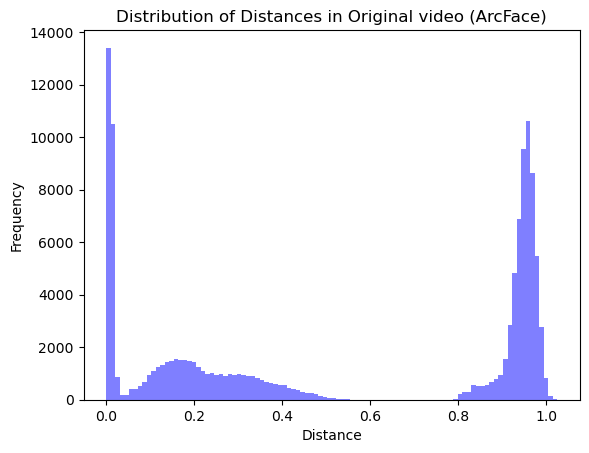

Mean: 0.5363
Median: 0.4454
Mode: [5.55111512e-16 6.66133815e-16]
Standard deviation: 0.4123


In [9]:
distance_distrubition(original_arcface, "Distribution of Distances in Original video (ArcFace)")

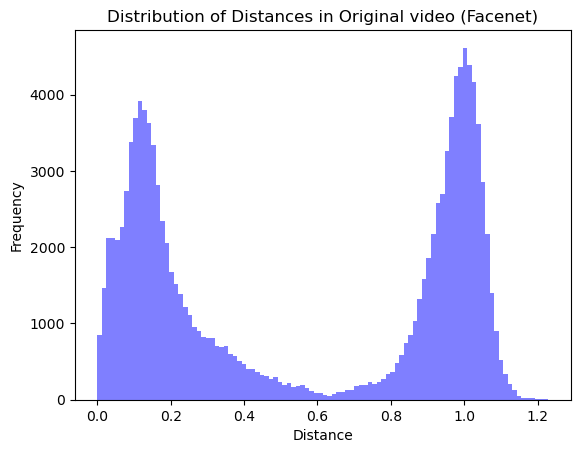

Mean: 0.5649
Median: 0.5193
Mode: [2.22044605e-16]
Standard deviation: 0.4103


In [10]:
distance_distrubition(original_facenet, "Distribution of Distances in Original video (Facenet)")

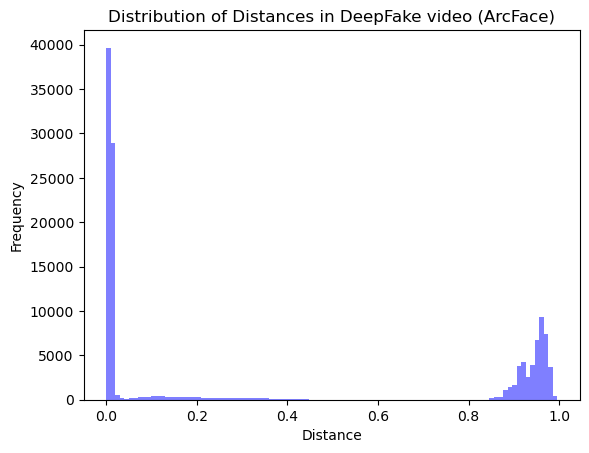

Mean: 0.3739
Median: 0.0145
Mode: [6.66133815e-16]
Standard deviation: 0.4465


In [11]:
distance_distrubition(fake_df[fake_df['model']== 'ArcFace'], "Distribution of Distances in DeepFake video (ArcFace)")

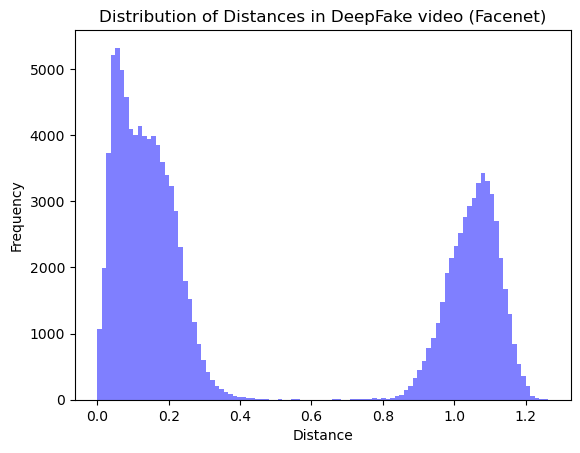

Mean: 0.4799
Median: 0.2041
Mode: [2.22044605e-16]
Standard deviation: 0.4518


In [12]:
distance_distrubition(fake_df[fake_df['model']== 'Facenet'], "Distribution of Distances in DeepFake video (Facenet)")

In [13]:
def plot_dual_distributions(df1, df2, threshold, title):
    # Access the 'distance' column in both DataFrames
    distance_values_df1 = df1['distance']
    distance_values_df2 = df2['distance']

    # Plotting the distributions with different colors and transparency
    plt.hist(distance_values_df1, bins=100, alpha=0.5, color='blue', label='Original')
    plt.hist(distance_values_df2, bins=100, alpha=0.5, color='orange', label='Fake')

    # Adding a vertical line for the threshold
    plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold')

    # Set labels, title, and legend
    plt.xlabel('Distance')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.legend()

    # Show the plot
    plt.show()
    
    # Display statistics in a tabular format
    stats_df = pd.DataFrame({
        'Statistic': ['Mean', 'Median', 'Mode', 'Standard Deviation'],
        'Original': [round(distance_values_df1.mean(), 4),
                     round(distance_values_df1.median(), 4),
                     distance_values_df1.mode().values[0],
                     round(distance_values_df1.std(), 4)],
        'Fake': [round(distance_values_df2.mean(), 4),
                 round(distance_values_df2.median(), 4),
                 distance_values_df2.mode().values[0],
                 round(distance_values_df2.std(), 4)]
    })

    print(stats_df.to_string(index=False))

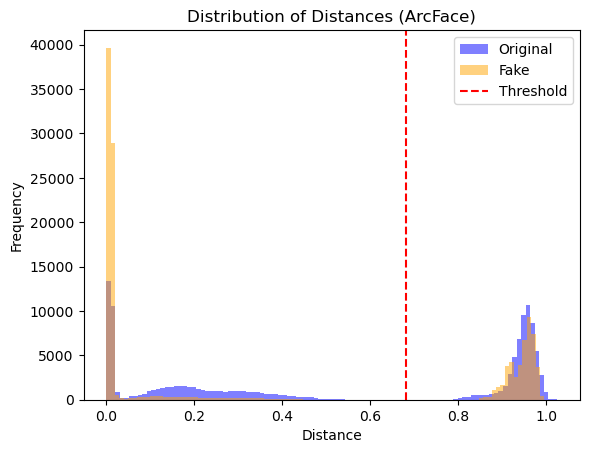

         Statistic     Original         Fake
              Mean 5.363000e-01 3.739000e-01
            Median 4.454000e-01 1.450000e-02
              Mode 5.551115e-16 6.661338e-16
Standard Deviation 4.123000e-01 4.465000e-01


In [14]:
plot_dual_distributions(original_arcface, fake_df[fake_df['model']== 'ArcFace'],0.68, "Distribution of Distances (ArcFace)")

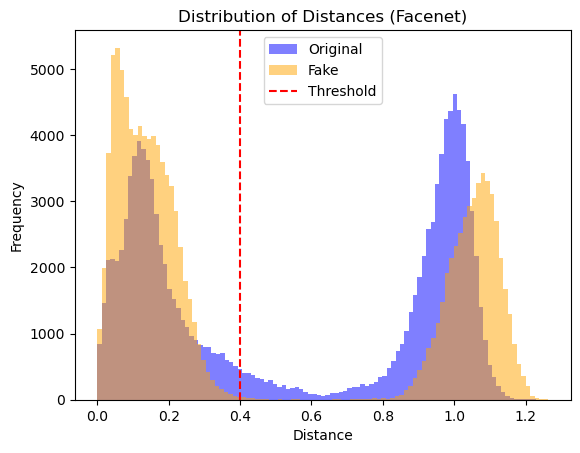

         Statistic     Original         Fake
              Mean 5.649000e-01 4.799000e-01
            Median 5.193000e-01 2.041000e-01
              Mode 2.220446e-16 2.220446e-16
Standard Deviation 4.103000e-01 4.518000e-01


In [15]:
plot_dual_distributions(original_facenet, fake_df[fake_df['model']== 'Facenet'],0.40, "Distribution of Distances (Facenet)")

1. Витягнути статистичні дані - щоб максимально пояснити відмінності/схожості
2. Розказати, що б я робила дальше і для чого

In [16]:
emma_orginal_arfcace = pd.read_json("emma_orginal_arcface_result.json")

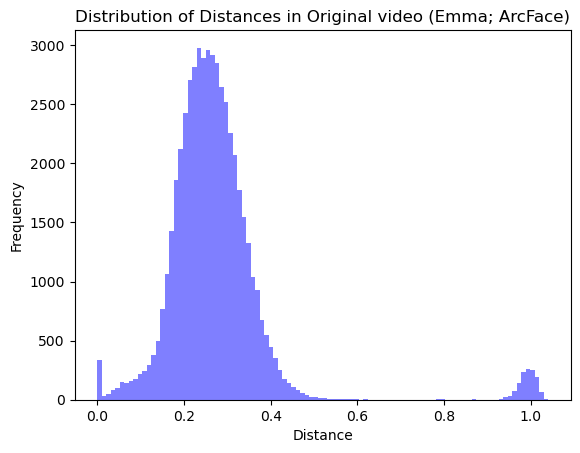

Mean: 0.2752
Median: 0.2587
Mode: [6.66133815e-16]
Standard deviation: 0.1355


In [17]:
distance_distrubition(emma_orginal_arfcace, "Distribution of Distances in Original video (Emma; ArcFace)")

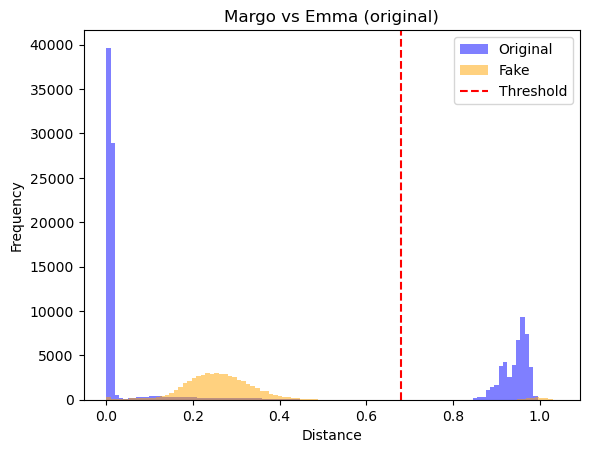

         Statistic     Original         Fake
              Mean 3.739000e-01 2.752000e-01
            Median 1.450000e-02 2.587000e-01
              Mode 6.661338e-16 6.661338e-16
Standard Deviation 4.465000e-01 1.355000e-01


In [18]:
plot_dual_distributions(fake_df[fake_df['model']== 'ArcFace'], emma_orginal_arfcace, 0.68, "Margo vs Emma (original)")

In [19]:
fake_emma_frames = iglob('frames/fake/emma/*')

In [20]:
fake_emma_arcface = get_results('ArcFace', list(fake_emma_frames))
save_results_as_json('fake_emma_arcface_file.json', fake_emma_arcface)

Processing with ArcFace: 100%|███████████████████████████████████████████████████████████████████████████████████| 325/325 [3:21:51<00:00, 37.27s/it]


In [26]:
df_fake_emma = pd.read_json('fake_emma_arcface_file.json')

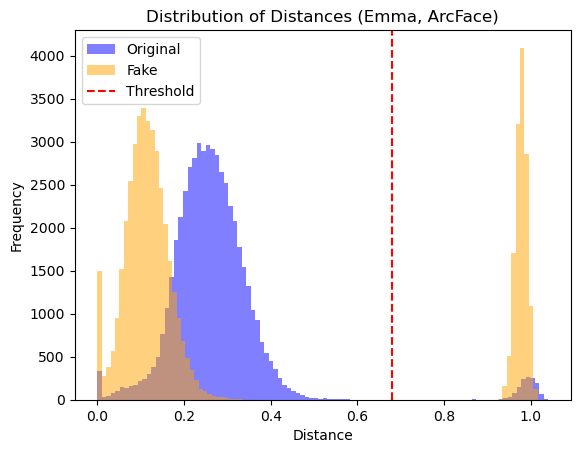

         Statistic     Original         Fake
              Mean 2.752000e-01 3.375000e-01
            Median 2.587000e-01 1.342000e-01
              Mode 6.661338e-16 6.661338e-16
Standard Deviation 1.355000e-01 3.815000e-01


In [28]:
plot_dual_distributions(emma_orginal_arfcace, df_fake_emma, 0.68, "Distribution of Distances (Emma, ArcFace)")